In [1]:
from fun_opti import *
import time

# Part I: Initialize the function

In [ ]:
def optimize_NOV(sv,path_ori=os.path.abspath('./images_paper/sase_s75.00_v15.00_rn0.50_ln4.00_needle.jpg'),output=0,append=1):
    sigma=sv[0]
    v0=sv[1]

    # preprosessing the ori image
    exp_zoom=reshape_Exp(path_ori)

    # gen and post processing the syn image
    syn_array,_,_,_=gen_Drop(sigma=sigma,volume0=v0,rneedle=0.5)
    # syn_arr,wmax,rneedle=gen_doplet_v5(sigma=sigma,volume0=v0,rneedle=0.5)

    # crop the margin of syn image and scale it
    syn_zoom=scale_Syn(syn_array)

    
    if output==0:
        NOV=cal_NOV(exp_zoom=exp_zoom,syn_zoom=syn_zoom,output=output)
        print ('x=%.2f,%.2f and NOV=%.4f'%(sv[0],sv[1],NOV))
        if append==1:
            Xs.append(sv)
            NOVs.append(NOV)  
        return NOV

    else:     
        NOV,C=cal_NOV(exp_zoom=exp_zoom,syn_zoom=syn_zoom,output=output)
        return NOV,C

## Start Optimization

In [6]:
import scipy.optimize

Xs=[]
NOVs=[]

x0=np.asarray((80,15))

# use scipy obtimaize the parameter
opStart=time.time()
print('Optimization Start')
#sigma; v0; length_Ne,r_Ne; x,y; scaling_rate;
res=scipy.optimize.minimize(optimize_NOV,x0,method='nelder-mead') #SLSQP #nelder-mead
#res=scipy.optimize.minimize(obtimize_v5,x0,method='SLSQP',options={'maxiter':15})
opEnd=time.time()
print('Optimize Program Running Time: ',opEnd-opStart)

Optimization Start
x=80.00,15.00 and NOV=0.0347
x=84.00,15.00 and NOV=0.0309
x=80.00,15.75 and NOV=0.0314
x=84.00,15.75 and NOV=0.0720
x=81.00,15.19 and NOV=0.0214
x=85.00,14.44 and NOV=0.0613
x=81.25,15.42 and NOV=0.0287
x=78.25,15.61 and NOV=0.0670
x=82.56,15.15 and NOV=0.0372
x=81.12,15.30 and NOV=0.0213
x=82.50,15.09 and NOV=0.0376
x=79.62,15.40 and NOV=0.0659
x=81.78,15.17 and NOV=0.0412
x=81.06,15.25 and NOV=0.0213
x=81.81,15.20 and NOV=0.0409
x=80.38,15.35 and NOV=0.0280
x=80.73,15.31 and NOV=0.0394
x=81.09,15.28 and NOV=0.0213
x=81.47,15.25 and NOV=0.0214
x=80.75,15.33 and NOV=0.0393
x=81.29,15.27 and NOV=0.0213
x=80.93,15.31 and NOV=0.0391
x=81.20,15.28 and NOV=0.0213
x=81.17,15.25 and NOV=0.0213
x=81.16,15.26 and NOV=0.0214
x=81.15,15.28 and NOV=0.0212
x=81.11,15.29 and NOV=0.0213
x=81.13,15.26 and NOV=0.0213
x=81.11,15.28 and NOV=0.0213
x=81.12,15.28 and NOV=0.0212
x=81.13,15.28 and NOV=0.0213
x=81.14,15.27 and NOV=0.0213
x=81.13,15.28 and NOV=0.0212
x=81.14,15.27 and NOV=0.

In [6]:
print(res)

 final_simplex: (array([[83.41012302, 14.93678796],
       [83.4101073 , 14.93678356],
       [83.41017624, 14.93679174]]), array([0.02104675, 0.02104675, 0.02104675]))
           fun: 0.021046747257354483
       message: 'Optimization terminated successfully.'
          nfev: 79
           nit: 33
        status: 0
       success: True
             x: array([83.41012302, 14.93678796])


Text(0, 0.5, 'NOV')

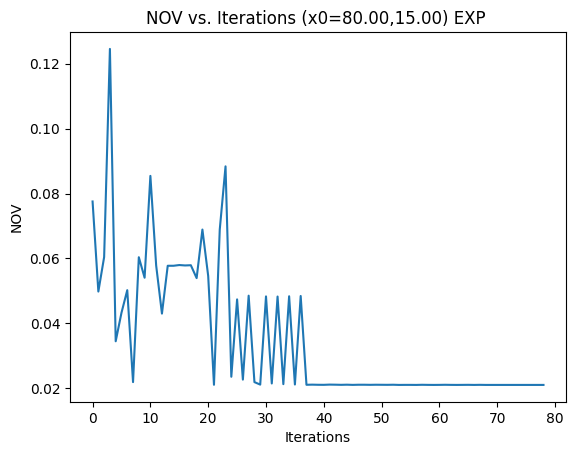

In [7]:
plt.title('NOV vs. Iterations (x0=%.2f,%.2f) EXP '%(x0[0],x0[1]))
plt.plot(NOVs)
plt.xlabel('Iterations')
plt.ylabel('NOV')

In [20]:
#save the record of optimization
arr_xs=np.asarray(Xs)
arr_NOVs=np.asarray(NOVs)
opti_record=np.vstack((arr_xs.T,arr_NOVs))
np.save('./opti_record_xs_exp_s%.2fv%.2f.npy'%(x0[0],x0[1]),opti_record)

In [23]:
print(res.x[0],res.x[1])

81.1357192993164 15.27536916732788


In [21]:
NOV,C=optimize_NOV(np.asarray((res.x[0],res.x[1])),output=1)

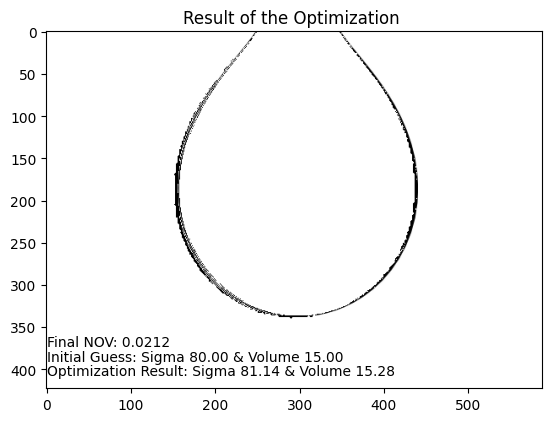

In [22]:
plt.imshow(C,cmap='gray')
plt.title('Result of the Optimization ')
plt.text(0,390,'Initial Guess: Sigma %.2f & Volume %.2f'%(x0[0], x0[1]))
plt.text(0,407,'Optimization Result: Sigma %.2f & Volume %.2f'%(res.x[0], res.x[1]))
plt.text(0,373,'Final NOV: %.4f'%(res.fun))
plt.savefig(fname='Opti_Result_RV_s%.2f_IG_s%.2f_v%.2f.png'%(73.04,x0[0],x0[1]))

0.1818282100308869


(-0.5, 874.5, 495.5, -0.5)

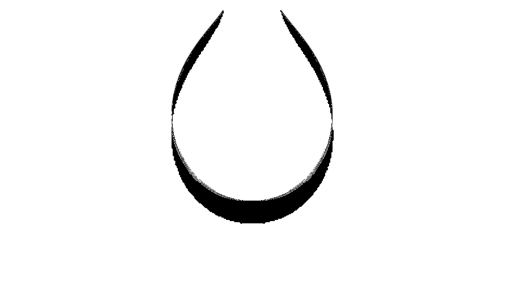

In [4]:
NOV,C=optimize_NOV(np.asarray((81,15.2)),output=1)


0.1818282100308869


(400.0, 0.0)

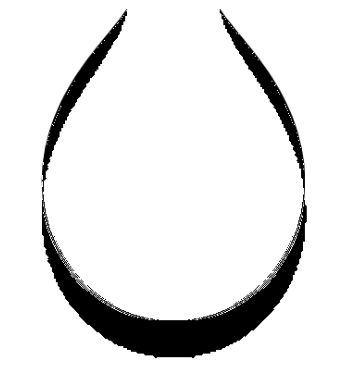

In [10]:
print(NOV)
plt.imshow(C,cmap='gray')
plt.axis('off')
plt.xlim(250,600)
plt.ylim(400,0)

# Contour Map with Synthetic s75v15

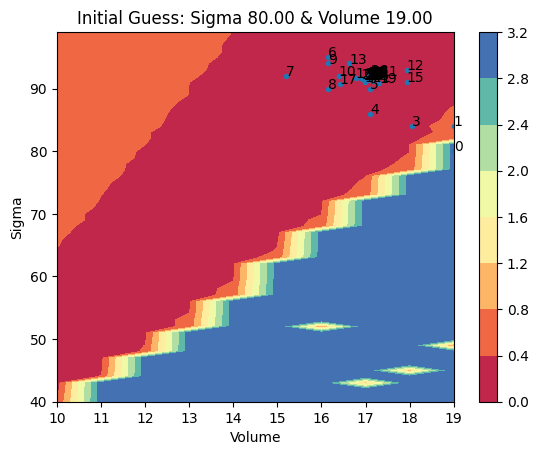

In [151]:
# Import the Map Data
NOVs_map=np.load('./NOVs_map.npy')
#NOVs_map=np.load('./NOVs_localmap_s75v15.npy')
sigma=np.arange(0,100,1)
volume=np.arange(0,20,1)
arxs=np.asarray(Xs)
x=arxs[:,0]
y=arxs[:,1]
z=NOVs

fig, ax = plt.subplots()
cs = ax.contourf(volume, sigma, NOVs_map, cmap=plt.get_cmap('Spectral'))
im = ax.scatter(y,x,marker='.')


n=np.arange(y.shape[0])
for i,txt in enumerate(n):
    ax.annotate(txt,(y[i],x[i]))
#添加colorbar
cbar = fig.colorbar(cs)

plt.xlabel('Volume')
plt.ylabel('Sigma')

plt.xlim((10,19))#volume 10-19
plt.ylim((40,99))#sigma 55-99

plt.title('Initial Guess: Sigma %.2f & Volume %.2f'%(x0[0], x0[1]))

plt.show()

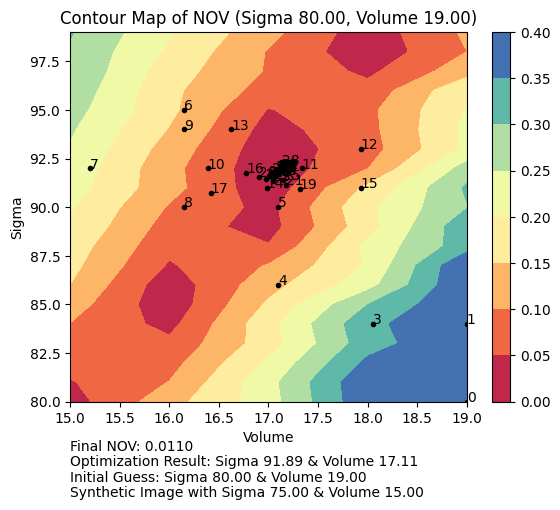

In [155]:
NOVs_map=np.load('./NOVs_map.npy')

NOVs_map0=NOVs_map
NOVs_map0[NOVs_map0>0.4]=0.4
sigma=np.arange(0,100,1)
volume=np.arange(0,20,1)
arxs=np.asarray(Xs)
x=arxs[:,0]
y=arxs[:,1]
z=NOVs


fig, ax = plt.subplots()
cs = ax.contourf(volume, sigma, NOVs_map0, cmap=plt.get_cmap('Spectral'))
im = ax.scatter(y,x,marker='.',color='black')


n=np.arange(y.shape[0])
for i,txt in enumerate(n):
    ax.annotate(txt,(y[i],x[i]))
#添加colorbar
cbar = fig.colorbar(cs)

plt.xlabel('Volume')
plt.ylabel('Sigma')

plt.xlim((15,19))#volume 10-19
plt.ylim((80,99))#sigma 55-99

textp=[15,77.5]
linespace=0.8
plt.text(textp[0],textp[1],'Final NOV: %.4f'%(res.fun))
plt.text(textp[0],textp[1]-linespace,'Optimization Result: Sigma %.2f & Volume %.2f'%(res.x[0], res.x[1]))
plt.text(textp[0],textp[1]-linespace*2,'Initial Guess: Sigma %.2f & Volume %.2f'%(x0[0], x0[1]))
plt.text(textp[0],textp[1]-linespace*3,'Synthetic Image with Sigma 75.00 & Volume 15.00')

#for i in range(len(x)):
#    if i<27:
#        plt.text(14,65-i,s='NOV_%.0f=%.4f'%(i,z[i]),color='blue')
#    elif i<54:
#        plt.text(15,92-i,s='NOV_%.0f=%.4f'%(i,z[i]),color='blue')

plt.title('Contour Map of NOV (Sigma %.2f, Volume %.2f)'%(x0[0], x0[1]))
plt.savefig(fname='Contour_Map_RV_s%.2f_v%.2f_IG_s%.2f_v%.2f.png'%(75,15,x0[0],x0[1]))
plt.show()

In [143]:
# Import the Map Data
NOVs_localmap=np.load('./NOVs_localmap_s75v15.npy')
NOVs_localmap0=NOVs_localmap
NOVs_localmap0[NOVs_localmap0>0.05]=0.05


In [ ]:

sigma=np.arange(0,80,0.1)
volume=np.arange(0,16,0.1)
arxs=np.asarray(Xs)
x=arxs[:,0]
y=arxs[:,1]
z=NOVs

fig, ax = plt.subplots()
cs = ax.contourf(volume, sigma, NOVs_map, cmap=plt.get_cmap('Spectral'))
im = ax.scatter(y,x,marker='.')


n=np.arange(y.shape[0])
for i,txt in enumerate(n):
    ax.annotate(txt,(y[i],x[i]))
#添加colorbar
cbar = fig.colorbar(cs)

plt.xlabel('volume')
plt.ylabel('sigma')

plt.xlim((14,16))#volume 10-19
plt.ylim((75,85))#sigma 55-99

plt.title('Initial Guess: Sigma %.2f & Volume %.2f'%(x0[0], x0[1]))

plt.show()

# Contour Map of EXP s73

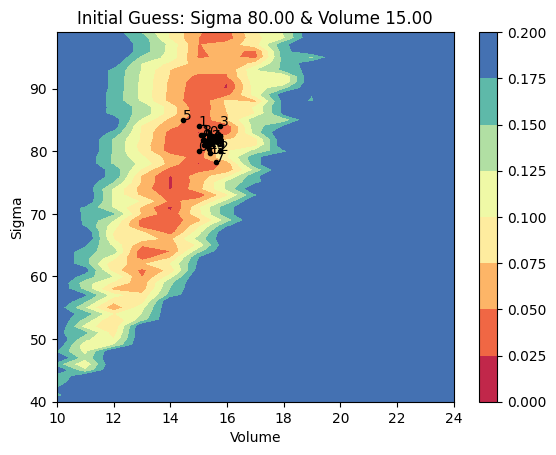

In [25]:
# Import the Map Data
NOVs_map=np.load('./NOVs_exp_miliq_s73_map.npy')
NOVs_map0=NOVs_map
NOVs_map0[NOVs_map0>0.2]=0.2
#NOVs_map=np.load('./NOVs_localmap_s75v15.npy')
sigma=np.arange(0,100,1)
volume=np.arange(0,30,1)

arxs=np.asarray(Xs)
x=arxs[:,0]
y=arxs[:,1]
z=NOVs

fig, ax = plt.subplots()
cs = ax.contourf(volume, sigma, NOVs_map, cmap=plt.get_cmap('Spectral'))
im = ax.scatter(y,x,marker='.',color='black')

n=np.arange(y.shape[0])
for i,txt in enumerate(n):
    ax.annotate(txt,(y[i],x[i]))
#添加colorbar
cbar = fig.colorbar(cs)

plt.xlabel('Volume')
plt.ylabel('Sigma')

plt.xlim((10,24))#volume 10-24
plt.ylim((40,99))#sigma 40-99

plt.title('Initial Guess: Sigma %.2f & Volume %.2f'%(x0[0], x0[1]))

plt.show()

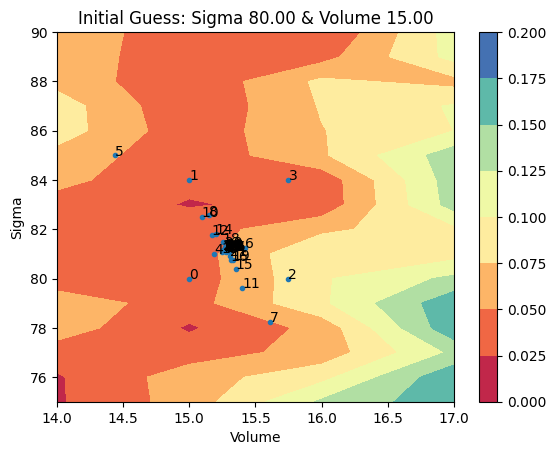

In [26]:
# Import the Map Data
NOVs_map=np.load('./NOVs_exp_miliq_s73_map.npy')
NOVs_map0=NOVs_map
NOVs_map0[NOVs_map0>0.2]=0.2
#NOVs_map=np.load('./NOVs_localmap_s75v15.npy')
sigma=np.arange(0,100,1)
volume=np.arange(0,30,1)

arxs=np.asarray(Xs)
x=arxs[:,0]
y=arxs[:,1]
z=NOVs

fig, ax = plt.subplots()
cs = ax.contourf(volume, sigma, NOVs_map, cmap=plt.get_cmap('Spectral'))
im = ax.scatter(y,x,marker='.')

n=np.arange(y.shape[0])
for i,txt in enumerate(n):
    ax.annotate(txt,(y[i],x[i]))
#添加colorbar
cbar = fig.colorbar(cs)

plt.xlabel('Volume')
plt.ylabel('Sigma')

plt.xlim((14,17))#volume 10-24
plt.ylim((75,90))#sigma 40-99

plt.title('Initial Guess: Sigma %.2f & Volume %.2f'%(x0[0], x0[1]))

plt.show()

In [190]:
print(np.min(NOVs_map0))

0.1673794660645504
